In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # import matplotlib's pythonic interface
import seaborn.apionly as sns    # import seaborn's functions, but not its style changes

plt.style.use('ggplot')          # set matplotlib's style and color palette to ggplot style
sns.set_style('ticks')           # set seaborn style to not use background grids

# tell the notebook to render plots inline
%matplotlib inline

In [2]:
# this module lets us select filenames with globbing patterns, such a wildcards
import glob

files = glob.glob('*Iso_FINAL.csv')
files.sort()

files

['Width3AttractorStats_Iso_FINAL.csv',
 'Width4AttractorStats_Iso_FINAL.csv',
 'Width5AttractorStats_Iso_FINAL.csv',
 'Width6AttractorStats_Iso_FINAL.csv',
 'Width7AttractorStats_Iso_FINAL.csv',
 'Width8AttractorStats_Iso_FINAL.csv']

In [3]:
# read each file into a separate dataframe and add it to a list of them
dfs = []
for file in files:
    dfs.append(pd.read_csv(file))

In [4]:
import os

In [5]:
# get the width number to use for indexing each file
filenums = [int(os.path.basename(file).split('A')[0][5:]) for file in files]
filenums

[3, 4, 5, 6, 7, 8]

In [15]:
bigdf = pd.concat(dfs, keys=filenums, names=['width'])

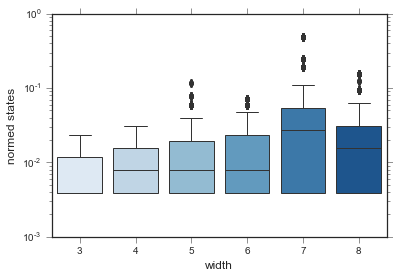

In [20]:
bigdf['normed states'] = bigdf['	states'] / 256
ax = sns.boxplot(data=bigdf.reset_index(), x='width', y='normed states')
ax.set_yscale('log')

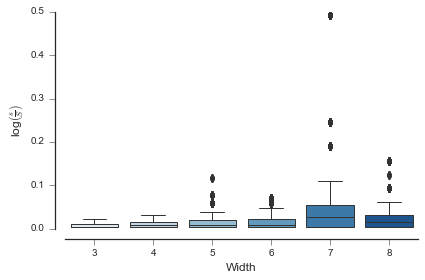

In [21]:
sns.set_palette("Blues")

bigdf['log(normed states)'] = pd.np.log10(bigdf['normed states'])
ax = sns.boxplot(data=bigdf.reset_index(), x='width', y='normed states')

plt.plot([-3, 8.5],[0,0],'k-',lw=1)

# let's add some axes labels to boot
ax.set_ylabel(r'log$(\frac{s}{S})$')
ax.set_xlabel('Width')
sns.despine(offset=10, ax=ax)

sns.plt.tight_layout()

In [22]:
ax.figure.savefig('visited_states_iso.pdf')